# Onset-Informed NMF (OI-NMF)

This notebook shows examples of the melody separation experiments by OI-NMF. For the 8 songs in MedleyDB used in the experiments, the one with the largest improvement of SI-SDR among 10 trials is taken as an example.

In each plot, the components below the black line correspond to the components given the onsets, and the target instrument source is recovered using these components.

In [1]:
%cd ..

import re
import warnings

import matplotlib.pyplot as plt
import pandas as pd
from hydra.experimental import initialize, compose

from src.data.audio import Audio
from src.transformer.audio_tf import AudioTransformer
from src.model import Model
from src.visualizer import Visualizer

initialize("../configs", strict=True)
config = compose("MedleyDB.yml")
visualizer = Visualizer(config)

/home/kusaka/Research/onset-informed-NMF


In [2]:
df_oinmf = pd.read_csv("report/DAFx2020/example/result.csv")

plt.rcParams["font.size"] = 16
warnings.simplefilter("ignore")

In [3]:
def plot_model_params(fname):
    model = Model.load_old(fname)
    K = model.fetch_component_num()

    fig, axes = plt.subplots(2, 2, figsize=(12, 8), tight_layout=True)
    visualizer.spectrogram(model.X_mag, ax=axes[0, 0])
    axes[0, 0].set_title("Input Spectrogram")
    visualizer.dictionary(model.W, onset_K=K, ax=axes[0, 1])
    axes[0, 1].set_title("Dictionary $W$")
    visualizer.activation(model.H, model.S, onset_K=K, ax=axes[1, 0])
    axes[1, 0].set_title("Activaton and Binary Mask $H \circ S$")
    visualizer.binary(model.onset_matrix, onset_K=K, ax=axes[1, 1])
    axes[1, 1].set_title("Onset Matrix $O$")
    
    X_est_target, X_est_accomp = model.reconst_spectrogram()
    
    tf = AudioTransformer(**config.transform_audio)
    tf.apply_HPSS = False
    gt_target_fname = re.sub("MIX_[0-9].npz", "TARGET.wav", fname)
    audio_gt_target = Audio.load(gt_target_fname, **config.audio)
    X_gt_target, _ = tf.transform(audio_gt_target.y)
    gt_accomp_fname = re.sub("MIX_[0-9].npz", "ACCOMP.wav", fname)
    audio_gt_accomp = Audio.load(gt_accomp_fname, **config.audio)
    X_gt_accomp, _ = tf.transform(audio_gt_accomp.y)
    
    fig, axes = plt.subplots(1, 2, figsize=(12, 4), tight_layout=True)
    visualizer.spectrogram(X_est_target, ax=axes[0])
    visualizer.spectrogram(X_gt_target,  ax=axes[1])
    axes[0].set_title("Recovered Target Spectrogram")
    axes[1].set_title("Ground Truth Target Spectrogram")

    fig, axes = plt.subplots(1, 2, figsize=(12, 4), tight_layout=True)
    visualizer.spectrogram(X_est_accomp, ax=axes[0])
    visualizer.spectrogram(X_gt_accomp,  ax=axes[1])
    axes[0].set_title("Recovered Accompaniment Spectrogram")
    axes[1].set_title("Ground Truth Accompaniment Spectrogram")

## BebopJazz

SI-SDR improvement: 7.456 [dB]


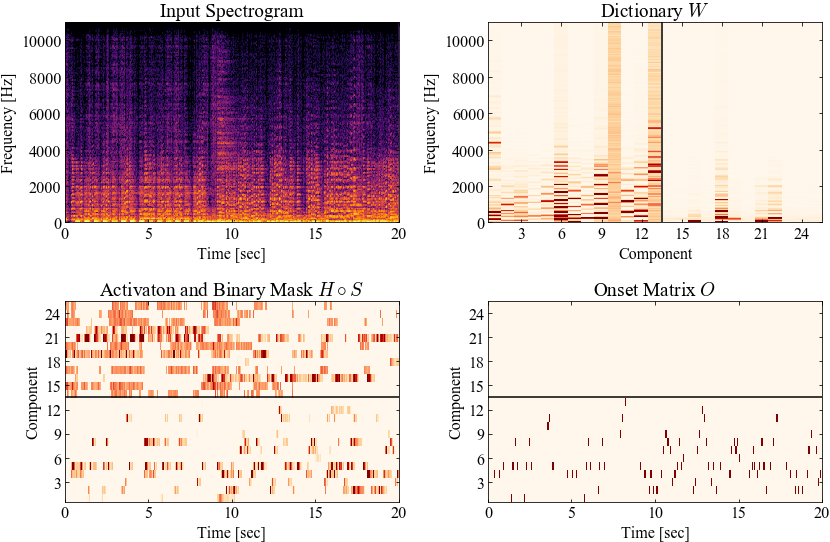

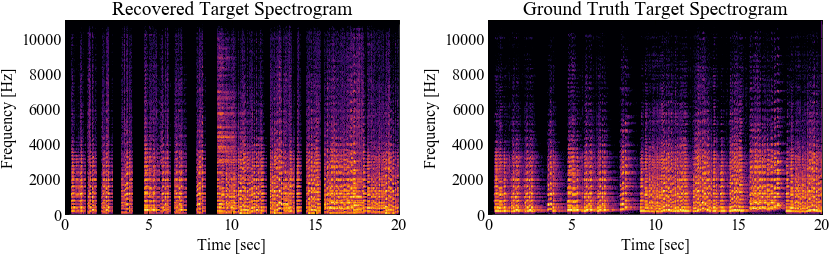

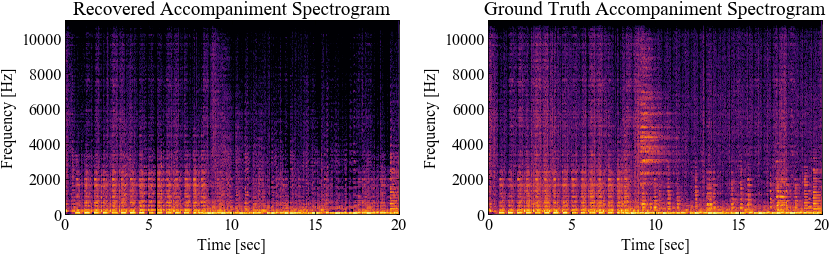

In [4]:
plot_model_params("report/DAFx2020/example/MusicDelta_BebopJazz_MIX_6.npz");
print("SI-SDR improvement: {:.3f} [dB]".format(df_oinmf["GSISDR"][6]))

## CoolJazz

SI-SDR improvement: 9.827 [dB]


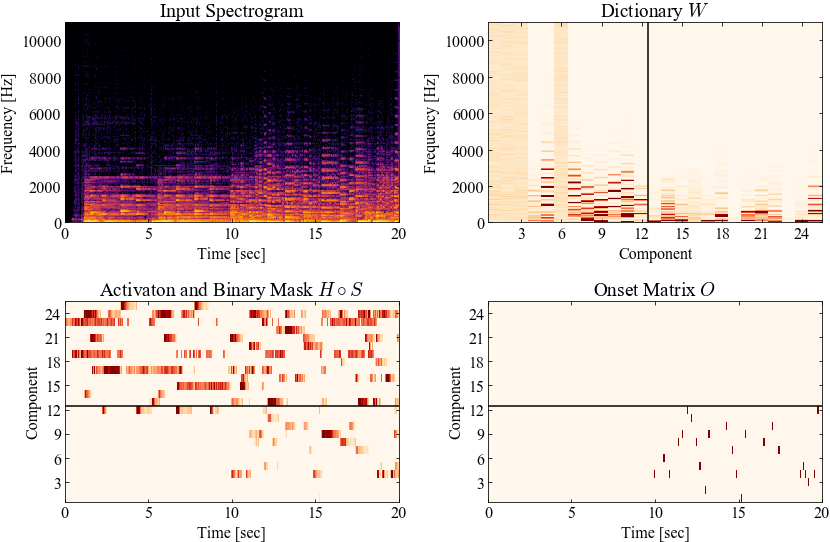

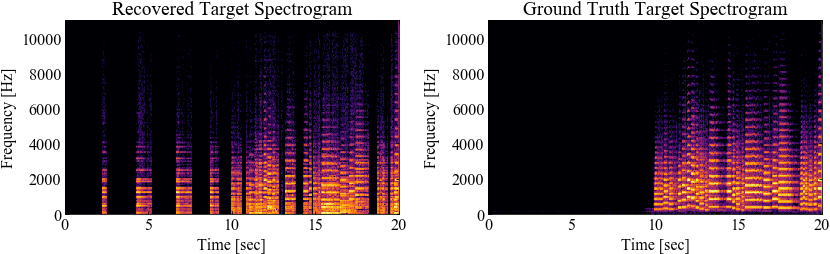

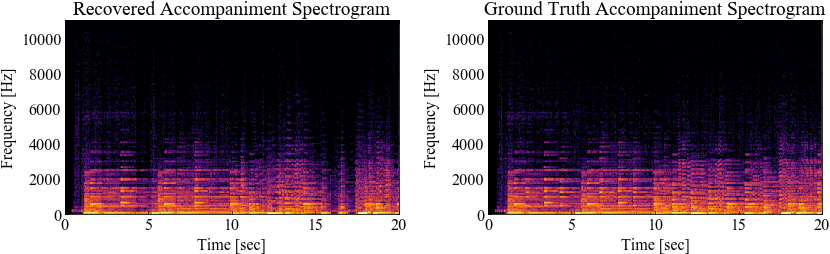

In [5]:
plot_model_params("report/DAFx2020/example/MusicDelta_CoolJazz_MIX_3.npz")
print("SI-SDR improvement: {:.3f} [dB]".format(df_oinmf["GSISDR"][13]))

## FreeJazz

SI-SDR improvement: 7.353 [dB]


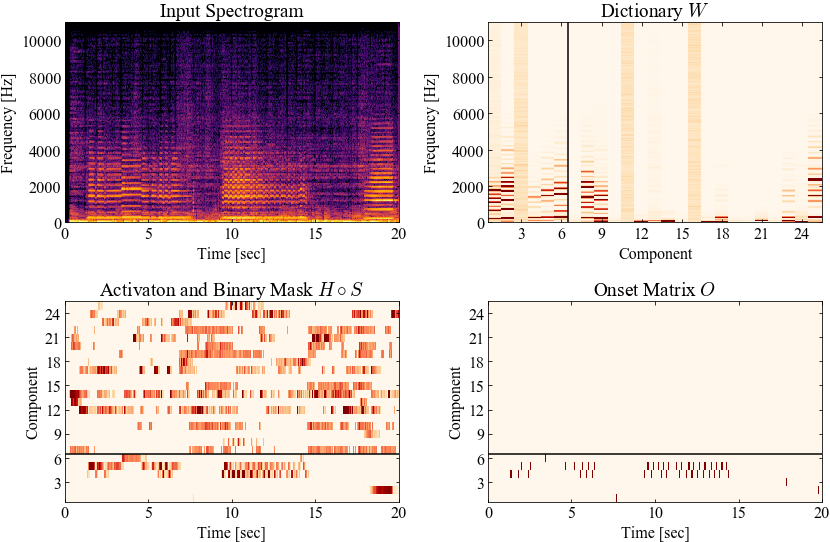

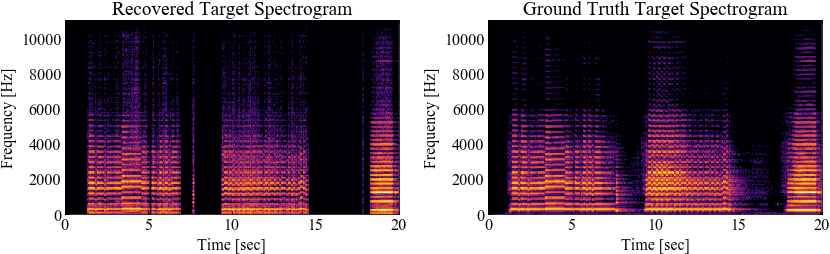

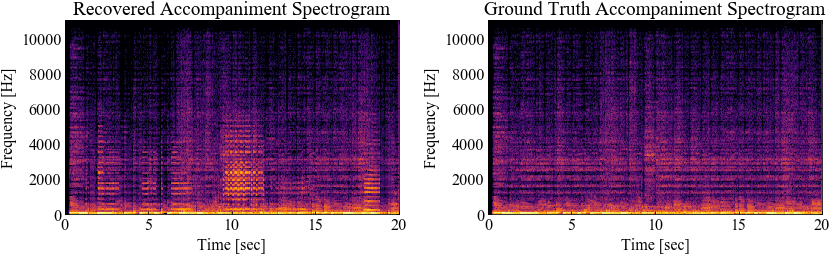

In [6]:
plot_model_params("report/DAFx2020/example/MusicDelta_FreeJazz_MIX_4.npz")
print("SI-SDR improvement: {:.3f} [dB]".format(df_oinmf["GSISDR"][24]))

## FunkJazz

SI-SDR improvement: 11.251 [dB]


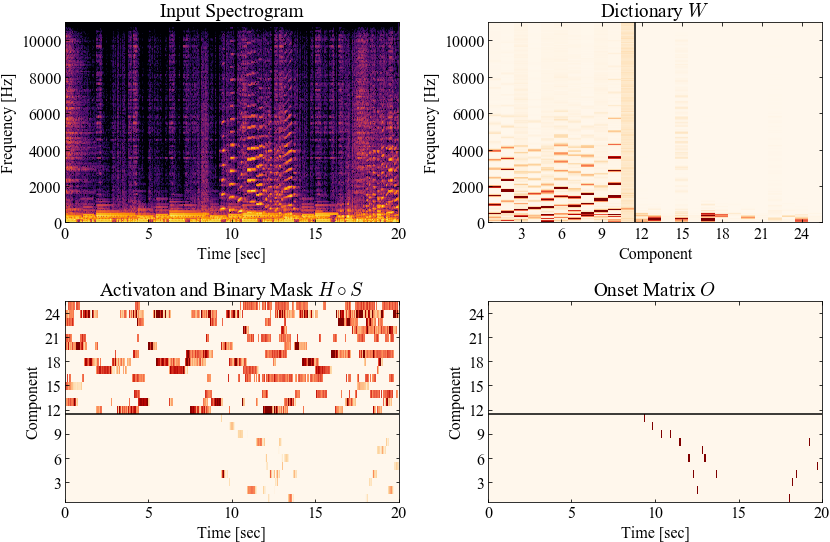

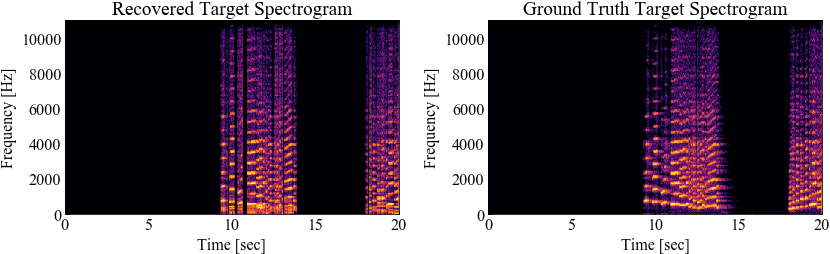

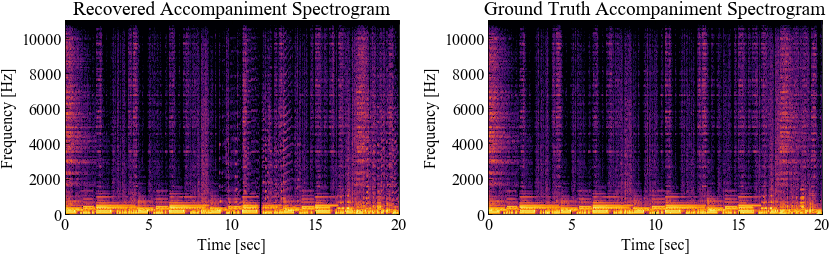

In [7]:
plot_model_params("report/DAFx2020/example/MusicDelta_FunkJazz_MIX_9.npz")
print("SI-SDR improvement: {:.3f} [dB]".format(df_oinmf["GSISDR"][39]))

## FusionJazz

SI-SDR improvement: 8.797 [dB]


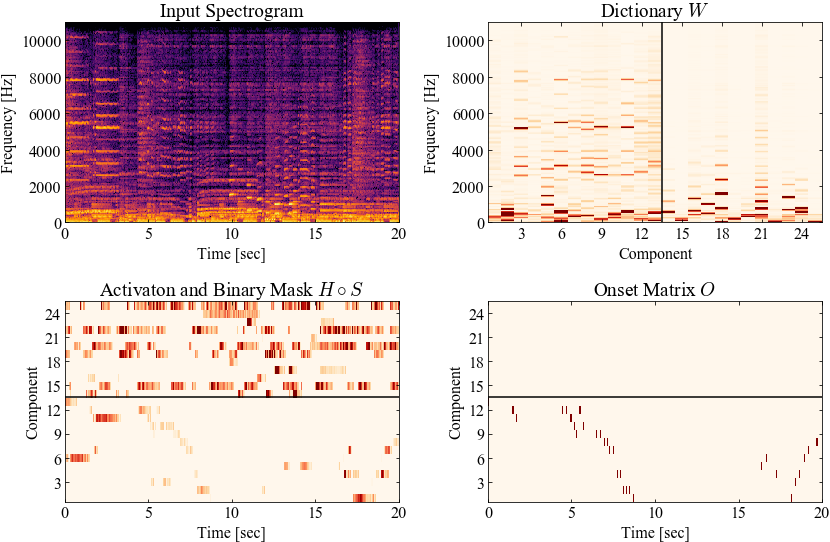

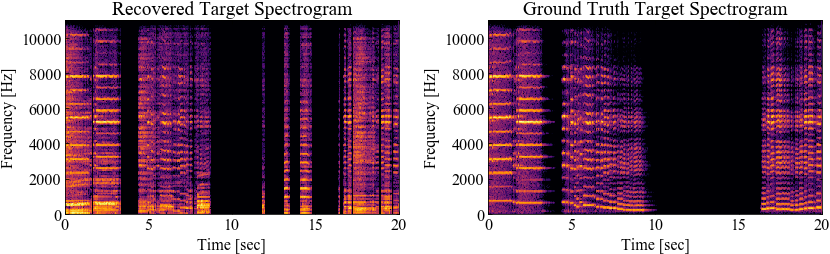

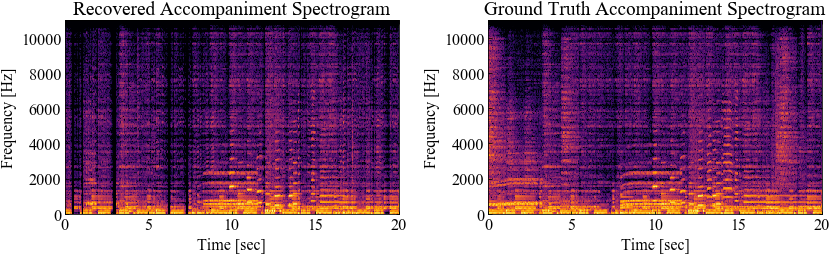

In [8]:
plot_model_params("report/DAFx2020/example/MusicDelta_FusionJazz_MIX_8.npz")
print("SI-SDR improvement: {:.3f} [dB]".format(df_oinmf["GSISDR"][48]))

## LatinJazz

SI-SDR improvement: 6.142 [dB]


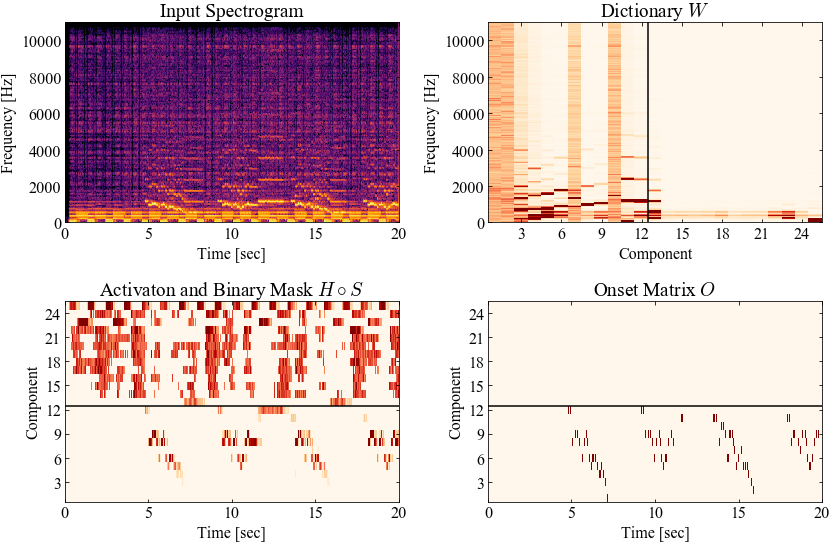

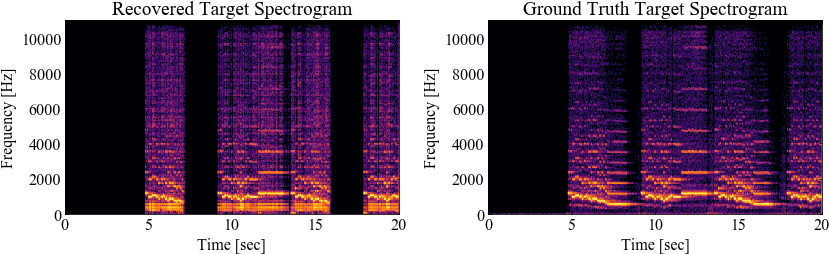

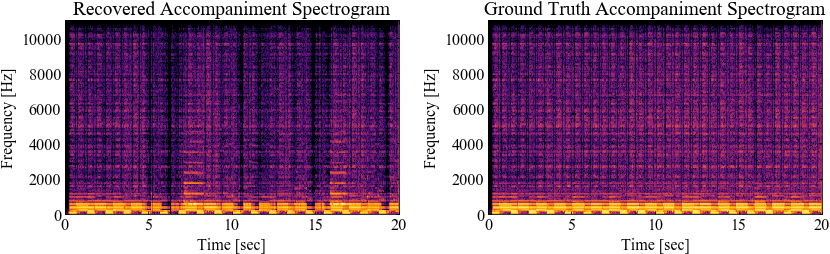

In [9]:
plot_model_params("report/DAFx2020/example/MusicDelta_LatinJazz_MIX_9.npz")
print("SI-SDR improvement: {:.3f} [dB]".format(df_oinmf["GSISDR"][59]))

## ModalJazz

SI-SDR improvement: 6.105 [dB]


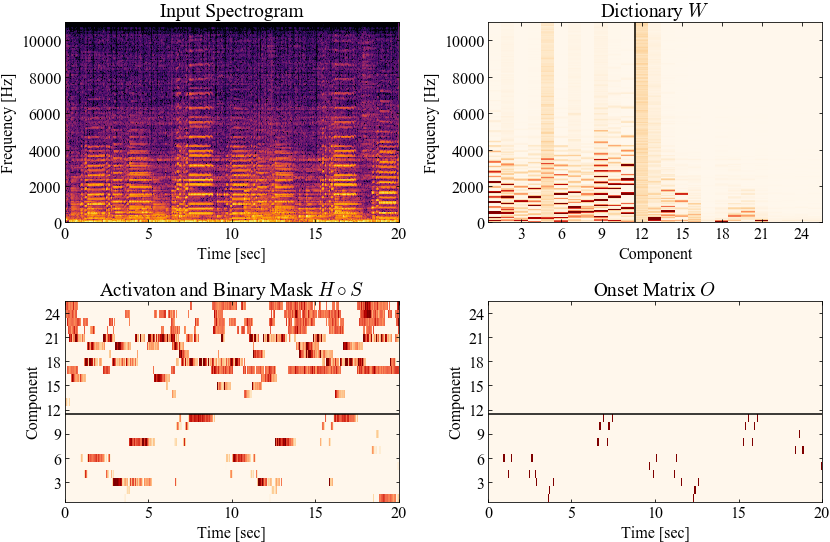

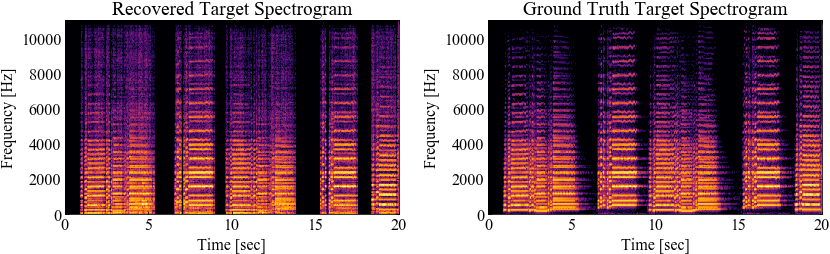

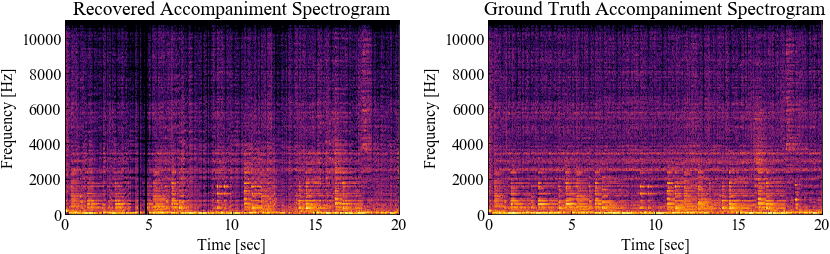

In [10]:
plot_model_params("report/DAFx2020/example/MusicDelta_ModalJazz_MIX_1.npz")
print("SI-SDR improvement: {:.3f} [dB]".format(df_oinmf["GSISDR"][61]))

## SwingJazz

SI-SDR improvement: 5.593 [dB]


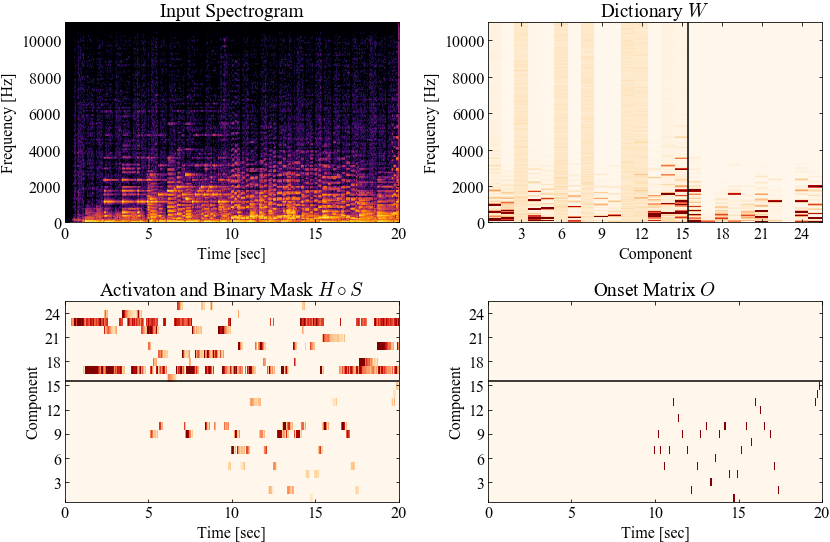

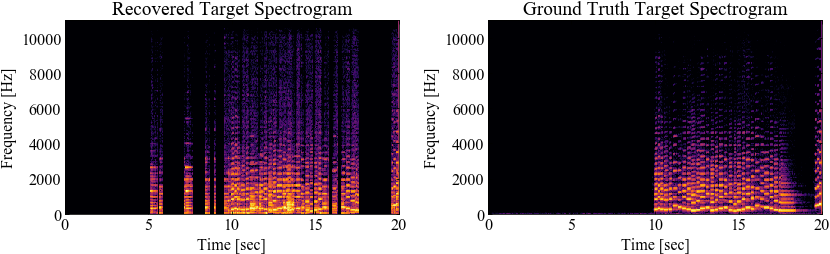

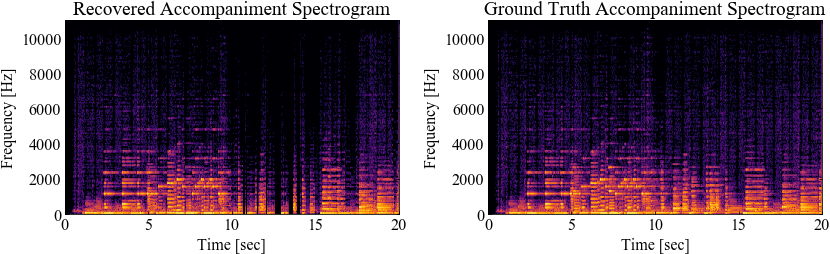

In [11]:
plot_model_params("report/DAFx2020/example/MusicDelta_SwingJazz_MIX_7.npz")
print("SI-SDR improvement: {:.3f} [dB]".format(df_oinmf["GSISDR"][77]))